### Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'

### Access the movies dataset here: https://www.kaggle.com/rounakbanik/the-movies-dataset

 ### Import data files and start exploring data at a high-level

In [2]:
#import credits csv files into dataframes
credits = pd.read_csv('credits.csv')

In [3]:
#see dataframe
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
#get info
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
#Drop any duplicates in credits based on id
credits = credits.drop_duplicates(subset=['id'])

In [6]:
#import movies csv file into dataframes
movies = pd.read_csv('movies_metadata.csv',low_memory=False)

In [7]:
#drop irrelevant columns: 'homepage','overview', 'original_title', 'imdb_id', 'spoken_languages', 
#'production_companies', 'production_countries','poster_path','popularity','tagline','video'
movies_dropped = movies.drop(columns = ['homepage','overview', 'original_title', 'spoken_languages',
                                        'production_companies', 'production_countries','imdb_id',
                                        'poster_path','popularity','tagline','video'])


In [8]:
movies_dropped.head()

,adult,belongs_to_collection,budget,genres,id,original_language,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [9]:
#Look at data info
movies_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 13 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
id                       45466 non-null object
original_language        45455 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
status                   45379 non-null object
title                    45460 non-null object
vote_average             45460 non-null float64
vote_count               45460 non-null float64
dtypes: float64(4), object(9)
memory usage: 4.5+ MB


In [10]:
#Drop any duplicates in movies_dropped based on id
movies_dropped = movies_dropped.drop_duplicates(subset=['id'])

### Fix errors in column types for 'budget' and 'id' columns

In [11]:
#Note that budget is not a numeric type. Convert budget to numeric.
movies_dropped['budget'] = pd.to_numeric(movies_dropped['budget'], errors='coerce')

#Note that id is also not a numeric type. Convert id to numeric
movies_dropped['id'] = pd.to_numeric(movies_dropped['id'], errors='coerce')

movies_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 13 columns):
adult                    45436 non-null object
belongs_to_collection    4491 non-null object
budget                   45433 non-null float64
genres                   45436 non-null object
id                       45433 non-null float64
original_language        45425 non-null object
release_date             45349 non-null object
revenue                  45430 non-null float64
runtime                  45173 non-null float64
status                   45349 non-null object
title                    45430 non-null object
vote_average             45430 non-null float64
vote_count               45430 non-null float64
dtypes: float64(6), object(7)
memory usage: 4.9+ MB


### Identify missing revenue and budget values as null and drop rows will null values in these columns

In [12]:
#Look at data statistics
#Note that many movies are showing a budget and revenue of 0. There are also movies with a runtime of 0.
movies_dropped.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,4.543300e+04,45433.000000,4.543000e+04,45173.00000,45430.000000,45430.000000
mean,4.224549e+06,108375.226179,1.121288e+07,94.12430,5.618329,109.935989
std,1.742799e+07,112479.760366,6.435213e+07,38.41554,1.924139,491.466335
min,0.000000e+00,2.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,0.000000e+00,26461.000000,0.000000e+00,85.00000,5.000000,3.000000
50%,0.000000e+00,59996.000000,0.000000e+00,95.00000,6.000000,10.000000
75%,0.000000e+00,157351.000000,0.000000e+00,107.00000,6.800000,34.000000
max,3.800000e+08,469172.000000,2.787965e+09,1256.00000,10.000000,14075.000000


In [13]:
#Number of movies with 0 revenue
movies_dropped[movies_dropped.revenue==0]['revenue'].count()

38032

In [14]:
#Number of movies with 0 budget
movies_dropped[movies_dropped.budget==0]['budget'].count()

36553

In [15]:
#Replace 0s in revenue and budget with null values
movies_dropped['revenue'] = movies_dropped['revenue'].replace(0,np.nan)
movies_dropped['budget'] = movies_dropped['budget'].replace(0,np.nan)

#Drop rows with null revenue and budget
movies_dropped = movies_dropped.dropna(subset=['revenue','budget'])

### Similarly, identify missing runtime, vote_average, and vote_count values (0) as null and drop from dataframe

In [16]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.runtime==0]['runtime'].count()

11

In [17]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.vote_average==0]['vote_average'].count()

7

In [18]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.vote_count==0]['vote_average'].count()

7

In [19]:
#Set runtime=0,vote_average,vote_count values as null
movies_dropped['runtime'] = movies_dropped['runtime'].replace(0,np.nan)
movies_dropped['vote_average'] = movies_dropped['vote_average'].replace(0,np.nan)
movies_dropped['vote_count'] = movies_dropped['vote_count'].replace(0,np.nan)

In [20]:
#Drop rows with null runtime values
movies_dropped = movies_dropped.dropna(subset = ['runtime','vote_average','vote_count'])

In [21]:
#Check for null entries. 4135 null belongs_to_collection left, indicating the movies that don't belong to a 
#collection.
movies_dropped.isnull().sum()

adult                       0
belongs_to_collection    4135
budget                      0
genres                      0
id                          0
original_language           0
release_date                0
revenue                     0
runtime                     0
status                      0
title                       0
vote_average                0
vote_count                  0
dtype: int64

### If the movie belongs to a collection (i.e. franchise), extract the name of the collection and replace any null values with 0s to indicate no collection.

In [22]:
#Convert 'belongs_to_collection' column to dictionaries and Nans
movies_dropped.belongs_to_collection = movies_dropped.belongs_to_collection.apply(lambda x: ast.literal_eval(x) 
                                                                                  if type(x) != float else None)


In [23]:
#Extract collection name in new column, 0 if none
movies_dropped['collection'] = movies_dropped.belongs_to_collection.apply(lambda x: x['name'] 
                                                                          if type(x) == dict else 0)


In [24]:
#Drop original 'belongs_to_collection' column
movies_dropped = movies_dropped.drop(columns = ['belongs_to_collection'])

In [25]:
#Look at statistics for updated data
#Note that now movies seem to have a budget and revenue of single digits ($1) which seems unlikely.
movies_dropped.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,5.356000e+03,5356.000000,5.356000e+03,5356.000000,5356.000000,5356.000000
mean,3.119983e+07,60461.286221,9.069922e+07,110.047050,6.283943,735.556385
std,4.022028e+07,95592.121111,1.664321e+08,21.502907,0.896771,1253.526284
min,1.000000e+00,5.000000,1.000000e+00,26.000000,1.000000,1.000000
25%,5.207500e+06,8758.250000,7.125805e+06,95.000000,5.700000,78.000000
50%,1.700000e+07,14331.000000,3.000000e+07,106.000000,6.300000,278.500000
75%,4.000000e+07,59860.250000,1.000050e+08,120.000000,6.900000,807.000000
max,3.800000e+08,443319.000000,2.787965e+09,338.000000,9.100000,14075.000000


### The table above shows single-digit revenue and budget values which is likely a result of erroneous data capture. Upon further inspection, multiple movies were found to have incorrectly low budget and revenue values. Since most movies are not made under 10,000 dollars and gross more than 1,500 dollars, these values were used as a budget cutoff and revenue cutoff, respectively, to safely exclude such erroneous values from the data.

In [26]:
#Number of movies that have a budget of less than $10,000 = 57
movies_dropped[movies_dropped.budget < 10000]['budget'].count()

57

In [27]:
#Drop extremely low budget movies since data might not be reliable (single digit budgets) and it is only 59 movies
movies_clean = movies_dropped[movies_dropped.budget>10000]

In [28]:
#Revenue is still showing minimum values in single digits.
movies_clean.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,5.297000e+03,5297.000000,5.297000e+03,5297.000000,5297.000000,5297.000000
mean,3.154734e+07,60326.669436,9.167072e+07,110.134038,6.282953,742.784406
std,4.030792e+07,95614.810333,1.670924e+08,21.501497,0.895977,1258.487144
min,1.117800e+04,5.000000,3.000000e+00,26.000000,1.000000,1.000000
25%,6.000000e+06,8653.000000,7.594693e+06,95.000000,5.700000,81.000000
50%,1.700000e+07,14194.000000,3.055339e+07,106.000000,6.300000,284.000000
75%,4.000000e+07,59797.000000,1.008538e+08,120.000000,6.900000,816.000000
max,3.800000e+08,443319.000000,2.787965e+09,338.000000,9.100000,14075.000000


In [29]:
#Number of movies that have a revenue of less than $1,500 = 57
movies_dropped[movies_dropped.revenue < 1500]['revenue'].count()

57

In [30]:
#Drop movies with revenue <$1500
movies_clean = movies_clean[movies_clean.revenue>=1500]

### Remove 'adult' column since all movies are categorized as 'False'.

In [31]:
#Look at distribution in adult column
movies_clean.adult.value_counts()

False    5283
Name: adult, dtype: int64

In [32]:
#Since no movies are adult movies, remove adult column
movies_clean = movies_clean.drop(columns = ['adult'])

### To merge the credits and movies dataframes, set 'id' column type as int to match the credits dataframe.

In [33]:
#Set id type as int to match credits dataframe
movies_clean.id = movies_clean.id.astype('int')

### Merge the credits and movies dataframes on the 'id' column.

In [34]:
#Merge movies and credits dataframes on ID
df = pd.merge(movies_clean,credits,on='id', how='left')

In [35]:
#Look at merged dataframe
df.head()

,budget,genres,id,original_language,release_date,revenue,runtime,status,title,vote_average,vote_count,collection,cast,crew
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,0,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


### The data in cast, crew, genres columns are stored as strings. Convert type to lists or dictionaries, identifying missing data as null and removing rows with missing data in these columns.

In [36]:
#Turn cast column into list
df['cast'] = df['cast'].apply(ast.literal_eval)

In [37]:
#Turn crew column into list
df['crew'] = df['crew'].apply(ast.literal_eval)

In [38]:
#Turn genre column into a list
df['genres'] = df.genres.apply(ast.literal_eval)

In [39]:
#Identify rows with missing cast and set them to null
df.cast = df.cast.apply(lambda x: np.nan if len(x)==0 else x)

In [40]:
#Identify rows with missing crew and set them to null
df.crew = df.crew.apply(lambda x: np.nan if len(x)==0 else x)

In [41]:
#Identify movies with no genres and replace with null
df.genres = df.genres.apply(lambda x: np.nan if len(x)==0 else x)

In [42]:
#Drop rows with null values
df = df.dropna(subset = ['crew', 'cast', 'genres'])

### Extract the name of the lead actor as the first-listed actor in the 'cast' column, and the name of the director from the 'crew' column. Drop the original 'cast' and 'crew' columns.

In [43]:
#Get lead actor from cast column
df['actor'] = df.cast.apply(lambda x: x[0]['name'])

In [44]:
#Get director from crew column
df['director'] = df.crew.apply(lambda row: next((item for item in row if item["job"] == "Director"), np.nan)['name'])

In [45]:
#Drop original cast, crew, genres columns
df = df.drop(columns = ['cast', 'crew'])

### Since each movie is typically associated with more than 1 genre, convert the genre variables into dummy/indicator variables (i.e. a binary column for each genre)

In [46]:
#Function to convert list of dictionaries to list of genre names
def genre_to_list(x):
    lst = []
    for i in range(len(x)):
        lst.append(x[i]['name'])
    return lst

In [47]:
#Apply function to convert genre column and create binary genre columns
df['genres'] = df.genres.apply(genre_to_list)
genre_columns = pd.get_dummies(df.genres.apply(pd.Series).stack()).sum(level=0)

In [48]:
#Add genre binary columns to df
df = df.join(genre_columns)

### Import IMDB list of highest-grossing actors and highest-grossing directors. Create binary columns indicating whether the lead actor and director are on the highest-grossing lists.

In [49]:
#Import highest grossing actors and directors databases
top_actors = pd.read_csv('actors_highest_grossing.csv',encoding='ISO-8859-1', usecols = ['Name'])
top_directors = pd.read_csv('directors_highest_grossing.csv',encoding='ISO-8859-1', usecols = ['Name'])

In [50]:
#Binary top_actor column indicating whether lead actor is on highest-grossing list (1 if yes, 0 if no)
df['top_actor'] = df.actor.isin(top_actors.Name).astype(int)

In [51]:
#Binary top_director column indicating whether director is on highest-grossing list (1 if yes, 0 if no)
df['top_director'] = df.director.isin(top_directors.Name).astype(int)

### Only keep released movies to ensure accurate budget and revenue information

In [52]:
#Remove rumored and post-production movies (n = 4) because revenue and budget are likely not reliable
df = df[df.status == 'Released']

In [53]:
#Drop status column since it is all released movies
df = df.drop(columns = ['status'])

### Convert the release_date column into a datetime column and categorize the dates into seasons, holidays, and months. 

In [54]:
#Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [55]:
#Define function to convert release dates into holidays/seasons
def season(x):
    #if february and close to valentines day = Valentine's day
    if (x.month == 2) and (10 <= x.day <= 20):
        return '''Valentine's Day'''
    #if late november or december = Holiday Season
    elif (x.month == 11 and x.day >= 15) or (x.month == 12):
        return 'Holiday Season'
    #if in May, June, or July = Summer
    elif (5 <= x.month <= 7):
        return "Summer"
    #if september and close to labor day
    elif (x.month == 9) and (1 <= x.day <= 7):
        return 'Labor Day'
    #if january and close to mlk day
    elif (x.month == 1) and (15 <= x.day <= 21):
        return 'MLK Day'
    #else just return month
    else:
        return x.strftime("%B")

In [56]:
#Add column for release season
df['release_season'] = df['release_date'].apply(season)

### Add a column to define success as a categorical variable (e.g. break-even, hit, flop) based on the ratio of revenue to budget.

In [57]:
#Add temporary ratio column (revenue/budget) to determine success
df['ratio'] = df.revenue/df.budget

In [58]:
#Define function to convert ratio to categorical variables
def success(x):
    if x >= 5:
        return 'Blockbuster'
    elif (x < 5) and (x >= 2.5):
        return 'Hit'
    elif (x < 2.5) and (x >= 1):
        return 'Break Even'
    elif (x < 1) and (x >= 0.25):
        return 'Flop'
    else:
        return 'Disaster'

In [59]:
#Add column of categorial variables
df['success_cat'] = df.ratio.apply(success)

In [60]:
#Drop ratio column
df = df.drop(columns='ratio')

### Add column for return-on-investment (ROI)

In [61]:
#Add column for return (revenue - budget)/budget
df['roi'] = (df.revenue-df.budget)/df.budget

### Reset index and rearrange columns, ensuring all column names are lowercase and have no spaces

In [62]:
#reset index
df = df.reset_index(drop=True)

In [63]:
#Rearrange columns and change all column names to lowercase with no spaces
cols = df.columns.tolist()
cols = ['title','id','collection','budget','genres','release_date','runtime','vote_average','vote_count',
        'original_language','actor','director','Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
        'Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie',
        'Thriller','War','Western','top_actor','top_director','release_season','revenue','roi','success_cat']
df = df[cols]

In [64]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [65]:
#Visualize final data
df.head()

,title,id,collection,budget,genres,release_date,runtime,vote_average,vote_count,original_language,...,tv_movie,thriller,war,western,top_actor,top_director,release_season,revenue,roi,success_cat
0,Toy Story,862,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",1995-10-30,81.0,7.7,5415.0,en,...,0,0,0,0,1,1,October,373554033.0,11.451801,Blockbuster
1,Jumanji,8844,0,65000000.0,"[Adventure, Fantasy, Family]",1995-12-15,104.0,6.9,2413.0,en,...,0,0,0,0,1,0,Holiday Season,262797249.0,3.043035,Hit
2,Waiting to Exhale,31357,0,16000000.0,"[Comedy, Drama, Romance]",1995-12-22,127.0,6.1,34.0,en,...,0,0,0,0,0,0,Holiday Season,81452156.0,4.090760,Blockbuster
3,Heat,949,0,60000000.0,"[Action, Crime, Drama, Thriller]",1995-12-15,170.0,7.7,1886.0,en,...,0,1,0,0,0,0,Holiday Season,187436818.0,2.123947,Hit
4,Sudden Death,9091,0,35000000.0,"[Action, Adventure, Thriller]",1995-12-22,106.0,5.5,174.0,en,...,0,1,0,0,0,0,Holiday Season,64350171.0,0.838576,Break Even


In [66]:
#Confirm all columns are of the right type and have no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 38 columns):
title                5262 non-null object
id                   5262 non-null int64
collection           5262 non-null object
budget               5262 non-null float64
genres               5262 non-null object
release_date         5262 non-null datetime64[ns]
runtime              5262 non-null float64
vote_average         5262 non-null float64
vote_count           5262 non-null float64
original_language    5262 non-null object
actor                5262 non-null object
director             5262 non-null object
action               5262 non-null uint8
adventure            5262 non-null uint8
animation            5262 non-null uint8
comedy               5262 non-null uint8
crime                5262 non-null uint8
documentary          5262 non-null uint8
drama                5262 non-null uint8
family               5262 non-null uint8
fantasy              5262 non-null uint8
foreign  

In [67]:
df.describe()

,id,budget,runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,...,romance,science_fiction,tv_movie,thriller,war,western,top_actor,top_director,revenue,roi
count,5262.000000,5.262000e+03,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5.262000e+03,5262.000000
mean,60112.900608,3.172721e+07,110.200304,6.287723,747.364690,0.265108,0.180160,0.054922,0.343216,0.160965,...,0.186811,0.119156,0.000190,0.281072,0.038008,0.016914,0.120487,0.075827,9.223473e+07,7.548629
std,95596.536029,4.037863e+07,21.505426,0.891516,1261.375204,0.441433,0.384357,0.227850,0.474828,0.367534,...,0.389797,0.324003,0.013786,0.449565,0.191235,0.128960,0.325561,0.264746,1.674949e+08,187.682173
min,5.000000,1.117800e+04,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.596000e+03,-0.999790
25%,8584.750000,6.000000e+06,95.000000,5.700000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000e+06,-0.197273
50%,14085.000000,1.750000e+07,106.000000,6.300000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.106662e+07,1.077324
75%,59184.500000,4.000000e+07,120.000000,6.900000,830.500000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.015876e+08,3.239585
max,443319.000000,3.800000e+08,338.000000,9.100000,14075.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.787965e+09,12889.386667


In [68]:
#Write to file
df.to_csv('cleaned.csv',index=False)

# Data Visualization & Statistical Analysis

In [69]:
#Import modules for statistical analysis
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [70]:
#Set random seed
np.random.seed(42)

### Copy df to cleaned for data visualization (to avoid overwriting cleaned df)

In [71]:
cleaned = df

### Specify the default seaborn style

In [72]:
sns.set(style="darkgrid", color_codes=True)

### Visualize any outliers in ROI

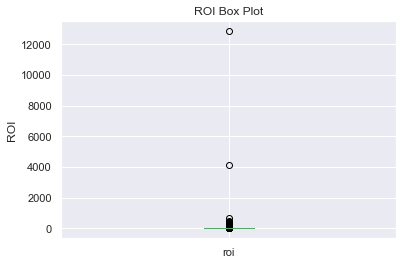

In [73]:
#ROI outliers
_ = cleaned[['roi']].boxplot()
_ = plt.ylabel('ROI')
_ = plt.title('ROI Box Plot')

The boxplot for ROI shows a number of extreme outliers with high ROI values. These points are reflective of movies made on smaller budgets that performed exceedingly well at the box-office (e.g. Paranormal Activity). 

### Visualize any outliers in Revenue

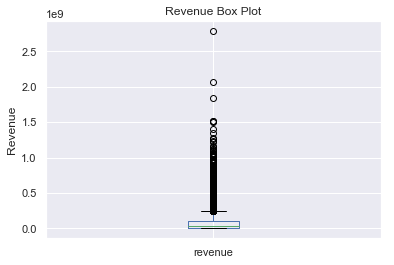

In [74]:
#Revenue outliers
_ = cleaned[['revenue']].boxplot()
_ = plt.ylabel('Revenue')
_ = plt.title('Revenue Box Plot')

The boxplot for revenue shows a large number of outliers on the high end (greater than ~200 M USD). These refer to movies that are often categorized as blockbusters (e.g. Star Wars, Jurassic Park). Since movie revenues are increasing (see below), these movies will still be taken into account in the initial analysis.

### Visualize any outliers in budget

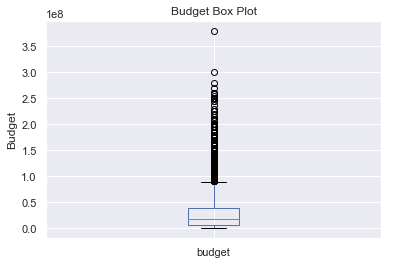

In [75]:
#Budget outliers
_ = cleaned[['budget']].boxplot()
_ = plt.ylabel('Budget')
_ = plt.title('Budget Box Plot')

The budget boxplot shows a large number of outliers with high budgets (greater than ~100M USD). With the budget of movies increasing (see below), these high-budget movies will also be included in the initial analysis.

### What does the distribution of budgets look like?

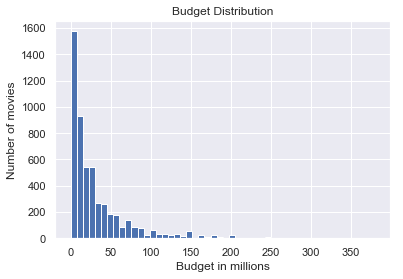

In [76]:
#Distribution of budgets
_ = cleaned.budget.apply(lambda x: x/1e6).plot(kind='hist',bins=50)
_ = plt.xlabel('Budget in millions')
_ = plt.ylabel('Number of movies')
_ = plt.title('Budget Distribution')

#### Is the distribution normal?

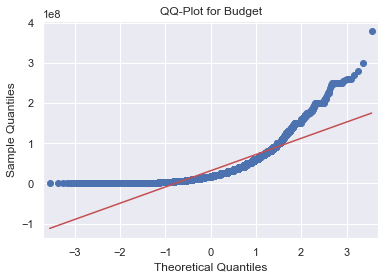

In [77]:
#QQ Plot
_ = qqplot(cleaned.budget,line='s')
_ = plt.title('QQ-Plot for Budget')

In [78]:
#D'Agostino's K^2 Test (alpha = 0.05)
stat, p = stats.normaltest(cleaned.budget)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample distribution looks Gaussian (fail to reject H0)')
else:
    print('Sample distribution does not look Gaussian (reject H0)')

Test Statistic=2784.926, p=0.000
Sample distribution does not look Gaussian (reject H0)


#### The majority of movies have a budget of less than 50 million USD, with the largest budget group being less than 10 M USD. The distribution is not normal.

### What does the distribution of revenue look like?

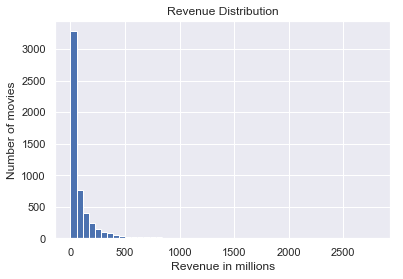

In [79]:
#Distribution of revenue
_ = cleaned.revenue.apply(lambda x: x/1e6).plot(kind='hist',bins=50)
_ = plt.xlabel('Revenue in millions')
_ = plt.ylabel('Number of movies')
_ = plt.title('Revenue Distribution')

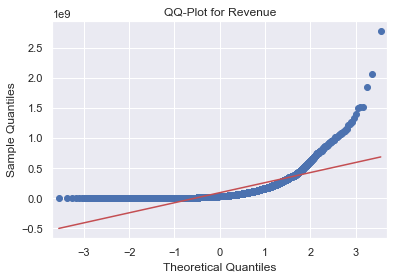

In [80]:
#QQ Plot
_ = qqplot(cleaned.revenue,line='s')
_ = plt.title('QQ-Plot for Revenue')

In [81]:
#D'Agostino's K^2 Test (alpha = 0.05)
stat, p = stats.normaltest(cleaned.revenue)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample distribution looks Gaussian (fail to reject H0)')
else:
    print('Sample distribution does not look Gaussian (reject H0)')

Test Statistic=4913.363, p=0.000
Sample distribution does not look Gaussian (reject H0)


#### Most movies have a revenue of less than 200 million USD with the majority grossing less than 50-100 million USD. The distribution does not appear to be normal.

### What does the distribution of ROI look like?

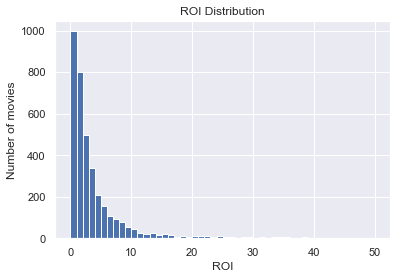

In [82]:
#Distribution of roi
_ = cleaned.roi.plot(kind='hist',bins=50,range=(0,50))
_ = plt.xlabel('ROI')
_ = plt.ylabel('Number of movies')
_ = plt.title('ROI Distribution')

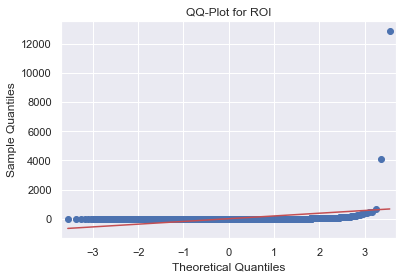

In [83]:
#QQ Plot
_ = qqplot(cleaned.roi,line='s')
_ = plt.title('QQ-Plot for ROI')

In [84]:
#D'Agostino's K^2 Test (alpha = 0.05)
stat, p = stats.normaltest(cleaned.roi)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample distribution looks Gaussian (fail to reject H0)')
else:
    print('Sample distribution does not look Gaussian (reject H0)')

Test Statistic=18080.631, p=0.000
Sample distribution does not look Gaussian (reject H0)


#### The vast majority of movies have an ROI of less than 5. The distribution is not normal.

### What does the distribution of categorial success look like?

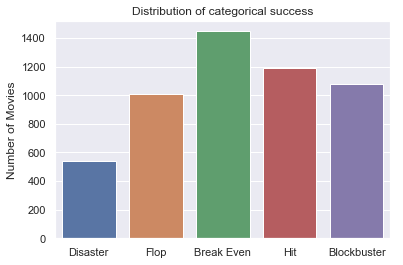

In [85]:
_ = sns.countplot(x="success_cat", data=cleaned,order=['Disaster','Flop','Break Even','Hit','Blockbuster'])
_ = plt.xlabel('')
_ = plt.ylabel('Number of Movies')
_ = plt.title('Distribution of categorical success')

#### The largest category of movies manage to break-even, with hits, blockbusters, and flops having similar ratios. The smallest group of films are disasters.

### What does the relationship between budget and revenue look like?

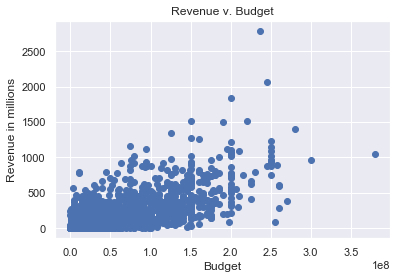

In [86]:
#Relationship between budget and revenue
_ = plt.scatter(x=cleaned.budget,y=cleaned.revenue/1e6)
_ = plt.ylabel('Revenue in millions')
_ = plt.title('Revenue v. Budget')
_ = plt.xlabel('Budget')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


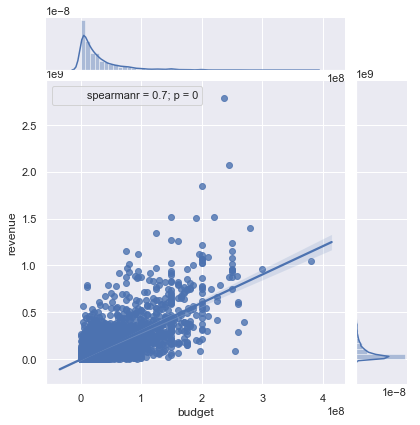

Samples are dependent (reject H0)


In [87]:
#Since the samples are not normally distributed, the Spearman's Rank Correlation can be used to check for correlation.
g = sns.JointGrid('budget', 'revenue', data = cleaned)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.spearmanr)
plt.show()
stat,p = stats.spearmanr(cleaned.budget,cleaned.revenue)
alpha = 0.05
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


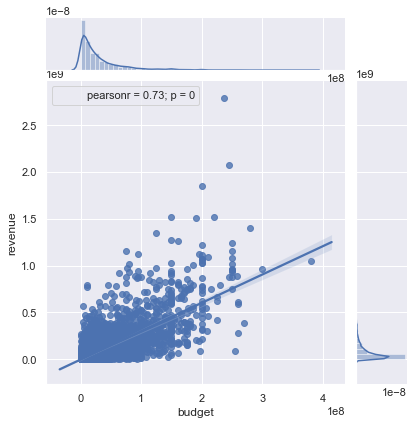

Samples are dependent (reject H0)


In [88]:
#Compare the Spearman's Rank Correlation to the Pearson's Correlation
g = sns.JointGrid('budget', 'revenue', data = cleaned)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)
plt.show()
stat,p = stats.pearsonr(cleaned.budget,cleaned.revenue)
alpha = 0.05
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

#### As expected, there appears to be a strong correlation between revenue and budget, based on the Spearman's rank correlation. Note that even though the sample distributions are not normal, the Pearson's correlation is quite similar to the Spearman's rank correlation. Also observe that there appears to be more scatter at higher budgets.

### Visualize the relationship between categorical success and budget

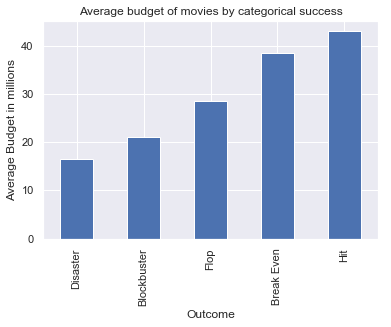

In [89]:
#Relationship between average budget and cat success
_ = cleaned[['success_cat','budget']].groupby('success_cat').mean().apply(lambda x: x/1e6).sort_values('budget').plot(kind='bar',legend=None)
_ = plt.title('Average budget of movies by categorical success')
_ = plt.ylabel('Average Budget in millions')
_ = plt.xlabel('Outcome')


#### The budget is lowest for movies that are disasters or blockbusters (i.e. extremes). Having too low of a budget can affect the quality, reputation, and star power of a movie, thus resulting in lower revenue (disasters). On the other hand, having a lower budget can also allow the movie to recover their costs more easily and be categorized as a blockbuster (classified as movies that gross 5 times their budget). Whether a lower-budget movie is a disaster or blockbuster likely depends on other factors such as genre, star power, release season etc.

### Which release season typically results in the highest movie revenues?

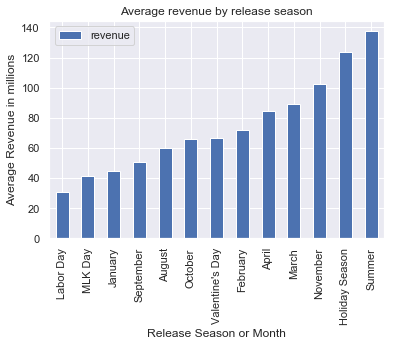

In [90]:
#Relationship between release_season and average revenue
_ = cleaned[['release_season','revenue']].groupby('release_season').mean().apply(lambda x: x/1e6).sort_values('revenue').plot(kind='bar')
_ = plt.title('Average revenue by release season')
_ = plt.xlabel('Release Season or Month')
_ = plt.ylabel('Average Revenue in millions')

#### Movies released in the summer make the most money on average followed by the holiday season. Holidays like Labor Day and MLK Day don't appear to have much of an impact. Outside of the holidays and summer, movies that have grossed the highest are typically released in November, March and April.

### How has movie revenue changed over the years?

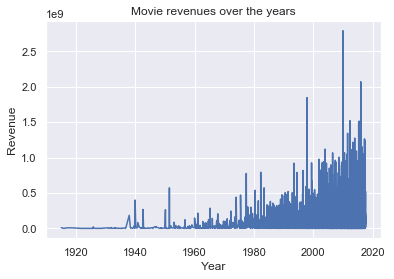

In [91]:
temp = cleaned[['release_date','revenue']].sort_values('release_date')
_ = plt.plot(temp.release_date, temp.revenue)
_ = plt.title('Movie revenues over the years')
_ = plt.ylabel('Revenue')
_ = plt.xlabel('Year')

#### Overall, movie revenues have been steadily increasing since the 1980s.

### How have movie budgets changed over the years?

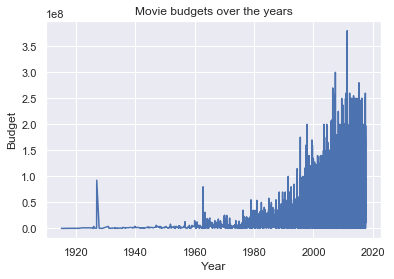

In [92]:
temp = cleaned[['release_date','budget']].sort_values('release_date')
_ = plt.plot(temp.release_date, temp.budget)
_ = plt.title('Movie budgets over the years')
_ = plt.ylabel('Budget')
_ = plt.xlabel('Year')

#### Movie budgets have increased dramatically over the past few decades.

### Is there a correlation between runtime and revenue?

### All movies

In [93]:
print('The average runtime for movies is: ',format(cleaned.runtime.mean(),'.2f'), 'minutes')

The average runtime for movies is:  110.20 minutes


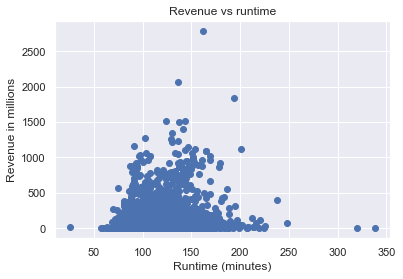

In [94]:
#Relationship between runtime and revenue
_ = plt.scatter(x=cleaned.runtime,y=cleaned.revenue/1e6)
_ = plt.title('Revenue vs runtime')
_ = plt.ylabel('Revenue in millions')
_ = plt.xlabel('Runtime (minutes)')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


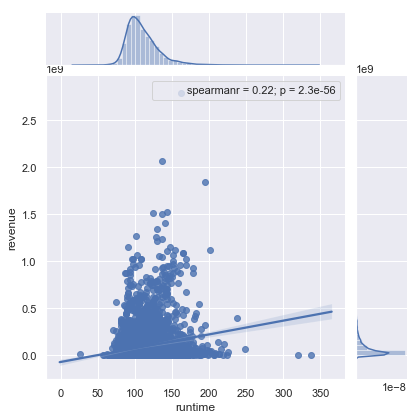

Samples are dependent (reject H0)


In [95]:
#Since the samples are not normally distributed, the Spearman's Rank Correlation can be used to check for correlation.
g = sns.JointGrid('runtime', 'revenue', data = cleaned)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.spearmanr)
plt.show()
alpha = 0.05
stat, p = stats.spearmanr(cleaned.runtime,cleaned.revenue)
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

### Movies with a runtime <= 120 (2 hours or less)

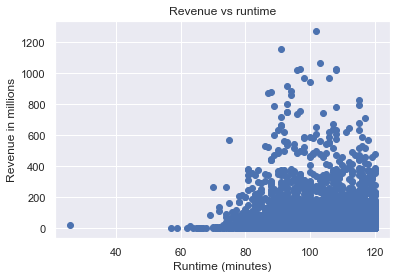

In [96]:
#Relationship between runtime and revenue
_ = plt.scatter(x=cleaned[cleaned.runtime<=120].runtime,y=cleaned[cleaned.runtime<=120].revenue/1e6)
_ = plt.title('Revenue vs runtime')
_ = plt.ylabel('Revenue in millions')
_ = plt.xlabel('Runtime (minutes)')

In [97]:
stat, p = stats.spearmanr(cleaned[cleaned.runtime<=120].runtime,cleaned[cleaned.runtime<=120].revenue)
print(format(stat,'.3f'))
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

0.156
Samples are dependent (reject H0)


### Movies with a runtime > 120 minutes (more than 2 hours)

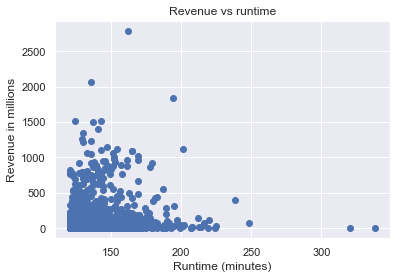

In [98]:
#Relationship between runtime and revenue
_ = plt.scatter(x=cleaned[cleaned.runtime>120].runtime,y=cleaned[cleaned.runtime>120].revenue/1e6)
_ = plt.title('Revenue vs runtime')
_ = plt.ylabel('Revenue in millions')
_ = plt.xlabel('Runtime (minutes)')

In [99]:
stat, p = stats.spearmanr(cleaned[cleaned.runtime>120].runtime,cleaned[cleaned.runtime>120].revenue)
print(format(stat,'.3f'))
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

-0.036
Samples are independent (fail to reject H0)


#### There is a weak correlation between runtime and revenue for movies less than 2 hours long. There does not appear to be a significant correlation for movies longer than 2 hours.

### Is there a correlation between runtime and ROI?

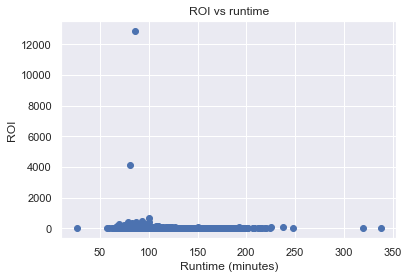

In [100]:
#Relationship between runtime and roi
_ = plt.scatter(x=cleaned.runtime,y=cleaned.roi)
_ = plt.title('ROI vs runtime')
_ = plt.ylabel('ROI')
_ = plt.xlabel('Runtime (minutes)')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


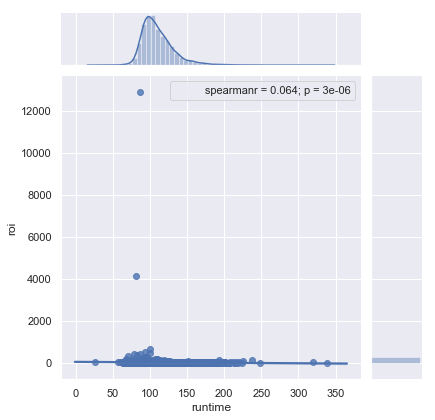

Samples are dependent (reject H0)


In [101]:
#Since the samples are not normally distributed, the Spearman's Rank Correlation can be used to check for correlation.
g = sns.JointGrid('runtime', 'roi', data = cleaned)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.spearmanr)
plt.show()
alpha = 0.05
stat, p = stats.spearmanr(cleaned.runtime,cleaned.roi)
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

#### It is difficult to assess the relationship with the presence of extreme outliers in ROI but there may be a very weak correlation between runtime and ROI.

### Is there a relationship between the average vote rating on The Movie Database (TMDB) and revenue?

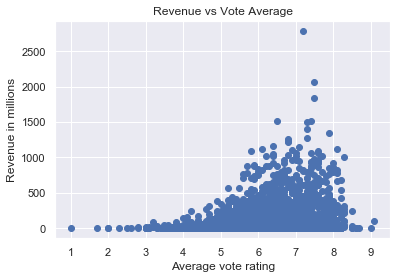

In [102]:
#Relationship between vote_average and revenue
_ = plt.scatter(x=cleaned.vote_average,y=cleaned.revenue/1e6)
_ = plt.ylabel('Revenue in millions')
_ = plt.xlabel('Average vote rating')
_ = plt.title('Revenue vs Vote Average')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


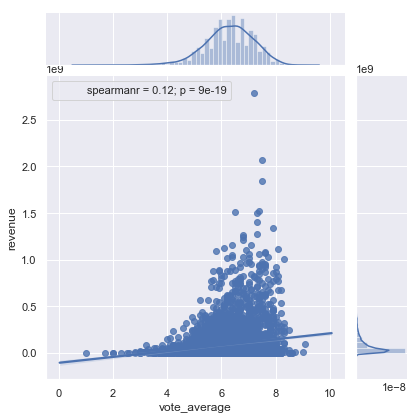

Samples are dependent (reject H0)


In [103]:
#Since the samples are not normally distributed, the Spearman's Rank Correlation can be used to check for correlation.
g = sns.JointGrid('vote_average', 'revenue', data = cleaned)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.spearmanr)
plt.show()
alpha = 0.05
stat, p = stats.spearmanr(cleaned.vote_average,cleaned.revenue)
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

### Movies with a vote average of above 5 (>5)

In [104]:
alpha = 0.05
stat, p = stats.spearmanr(cleaned[cleaned.vote_average>5].vote_average,cleaned[cleaned.vote_average>5].revenue)
print(format(stat,'.3f'))
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

0.059
Samples are dependent (reject H0)


### Movies with a vote average of 5 or below (<=5)

In [105]:
alpha = 0.05
stat, p = stats.spearmanr(cleaned[cleaned.vote_average<=5].vote_average,cleaned[cleaned.vote_average<=5].revenue)
print(format(stat,'.3f'))
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

0.195
Samples are dependent (reject H0)


### How many movies have a rating of >=5 vs. <5?

In [106]:
print('Number of movies with average rating of 5 or below:',cleaned[cleaned.vote_average <=5].title.count())
print('Number of movies with average rating of above 5:',cleaned[cleaned.vote_average >5].title.count())

Number of movies with average rating of 5 or below: 433
Number of movies with average rating of above 5: 4829


####  Movie with a rating less than 5 seem to be associated with lower revenues. The majority of movies have a rating between 5 and 9 and but the relationship between revenue and rating is unclear in this region. Overall, it appears there is a weak positive correlation between the vote average and revenue.

### Is there a relationship between the number of votes on The Movie Database (TMDB) and revenue?

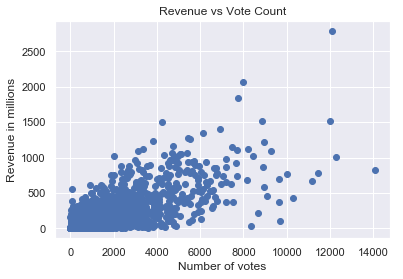

In [107]:
#Relationship between vote_count and revenue
_ = plt.scatter(x=cleaned.vote_count,y=cleaned.revenue/1e6)
_ = plt.ylabel('Revenue in millions')
_ = plt.xlabel('Number of votes')
_ = plt.title('Revenue vs Vote Count')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


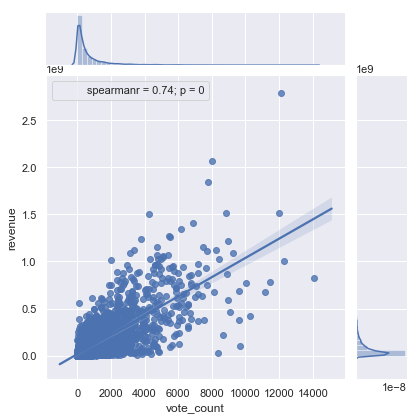

Samples are dependent (reject H0)


In [108]:
#Since the samples are not normally distributed, the Spearman's Rank Correlation can be used to check for correlation.
g = sns.JointGrid('vote_count', 'revenue', data = cleaned)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.spearmanr)
plt.show()
alpha = 0.05
stat, p = stats.spearmanr(cleaned.vote_count,cleaned.revenue)
if p > alpha:
    print('Samples are independent (fail to reject H0)')
else:
    print('Samples are dependent (reject H0)')

#### There is a much stronger correlation between vote counts and revenue, with higher vote counts on TMDB typically being associated with higher revenue. Note that here is significantly more scatter in vote counts greater than ~7000.

### Do movies that belong to a collection typically gross higher than movies that do not?

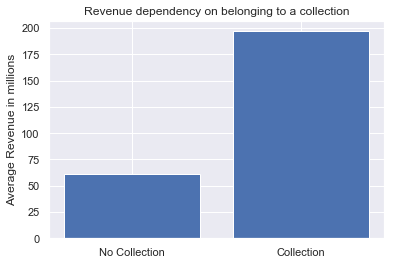

In [109]:
#Average revenue when belonging to a collection vs when not
no_collection = cleaned[cleaned.collection == 0].revenue.mean()
#Average revenue when belonging to a collection vs when not
collection = cleaned[cleaned.collection != 0].revenue.mean()

_ = plt.bar(['No Collection', 'Collection'],[no_collection/1e6,collection/1e6],align='center')
_ = plt.ylabel('Average Revenue in millions')
_ = plt.title('Revenue dependency on belonging to a collection')

#### Is there a statistically significant difference in mean revenue between movies that belong to a collection and movies that don't?

#### t-test

In [110]:
#Null hypothesis: Mean revenues are equal for movies that belong to a collection and movies that don't
#Alternate hypothesis: Mean revenues are not equal for movies that belong to a collection and movies that don't

stat,p = stats.ttest_ind(cleaned[cleaned.collection == 0].revenue,cleaned[cleaned.collection != 0].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.01:
    print('Reject null hypothesis: Sample means are not equal')
else:
    print('Fail to reject null hypothesis: Sample means are equal')

test-statistic: -26.412
p-value: 1.817e-144
Reject null hypothesis: Sample means are not equal


Movies that belong to a collection (i.e. franchise) gross, on average, almost 4 times higher than movies that do not belong to a collection. Statistically, this difference in mean revenue is significant as observed by the t-test.

### What are the top 10 collections with the highest total revenue?

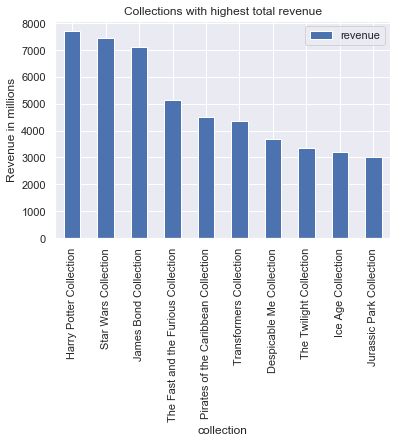

In [111]:
#Top 10 collections with highest collective revenue
_ = cleaned[['collection','revenue']].groupby('collection').sum().apply(lambda x: x/1e6).sort_values('revenue'
                                                                          ,ascending=False).iloc[1:11].plot(kind='bar')
_ = plt.title('Collections with highest total revenue')
_ = plt.ylabel('Revenue in millions')


The Harry Potter, Star Wars, and James Bond collections have the highest total revenue.

### What are the top 10 collections with the highest average movie revenue?

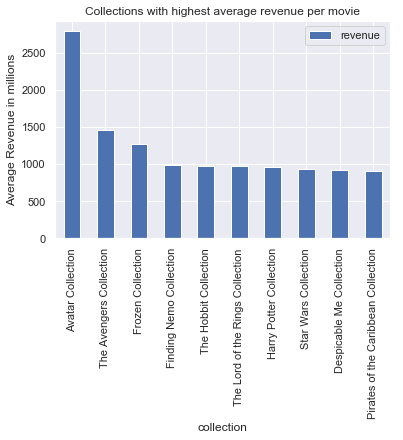

In [112]:
#Top 10 collections with highest average revenue per movie
_ = cleaned[['collection','revenue']].groupby('collection').mean().apply(lambda x: x/1e6).sort_values('revenue'
                                                                          ,ascending=False).iloc[0:10].plot(kind='bar')
_ = plt.ylabel('Average Revenue in millions')
_ = plt.title('Collections with highest average revenue per movie')


The Avatar collection have the highest average movie revenue out of any other collection in this dataset. However, it should be noted that there is only one movie released in this collection (sequels are currently in the works).

### Does having a top actor as the lead have an impact on movie revenue and/or ROI?

### Revenue

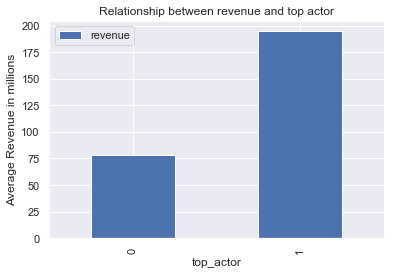

In [113]:
#Relationship between having a top actor and revenue
_ = cleaned[['top_actor','revenue']].groupby('top_actor').mean().apply(lambda x: x/1e6).plot(kind='bar')
_ = plt.title('Relationship between revenue and top actor')
_ = plt.ylabel('Average Revenue in millions')

### ROI

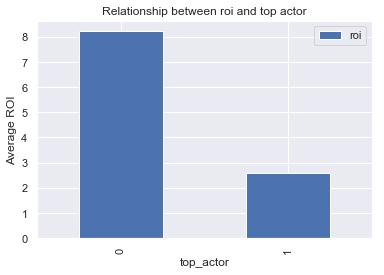

In [114]:
#Relationship between having a top actor and roi
_= cleaned[['top_actor','roi']].groupby('top_actor').mean().plot(kind='bar')
_ = plt.title('Relationship between roi and top actor')
_ = plt.ylabel('Average ROI')

A top actor is defined as any actor appearing on highest grossing actors list on IMDB. While having a top actor as a lead does result in a much higher revenue on average (~200M vs 50M USD), it also results in a lower ROI (~75% decrease), likely due to the higher compensation top actors demand. 

#### Are these observed differences in average revenue/ROI between movies with top actors and movies without top actors statistically significant?

#### T-test for difference in mean revenues

In [115]:
#Null hypothesis: Mean revenues are equal for movies with a top lead actor vs movies without.
#Alternate hypothesis: Mean revenues are not equal for movies with a top lead actor vs movies without.

stat,p = stats.ttest_ind(cleaned[cleaned.top_actor == 0].revenue,cleaned[cleaned.top_actor == 1].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Sample revenue means are not equal')
else:
    print('Fail to reject null hypothesis: Sample revenue means are equal')

test-statistic: -16.902
p-value: 1.885e-62
Reject null hypothesis: Sample revenue means are not equal


#### Bootstrapping approach for difference in mean revenues

In [116]:
#Define function to calculate difference of means
def bs_diff_of_means(data1,data2,size):
    
    #Create empty array to store bootstrap replicates
    bs_replicates = np.empty(size)
    
    #Loop multiple times
    for i in range(size):
        
        #Generate new bs samples
        bs_data1 = np.random.choice(data1,size=len(data1))
        bs_data2 = np.random.choice(data2,size=len(data2))
        
        #Calculate difference of mean
        bs_replicates[i] = np.mean(bs_data1) - np.mean(bs_data2)
    
    return bs_replicates

In [117]:
#Calculate observed difference in mean
sample_diff = cleaned[cleaned.top_actor == 0].revenue.mean() - cleaned[cleaned.top_actor != 0].revenue.mean()
print(format(sample_diff,'.2f'))

-116770368.04


In [118]:
#Calculate pooled mean (i.e. mean revenue for all movies)
pooled_mean = cleaned.revenue.mean()

# Shift data for movies with top actors and movies without top actors, assuming null hypothesis (means are equal)
#i.e. mean for both samples = pooled_mean

#Shifted data for movies with top actors in the lead
top_actor = cleaned[cleaned.top_actor == 0].revenue - cleaned[cleaned.top_actor == 0].revenue.mean() + pooled_mean

#Shifted data for movies without top actors in the lead
no_top_actor = cleaned[cleaned.top_actor != 0].revenue - cleaned[cleaned.top_actor != 0].revenue.mean() + pooled_mean

#Generate 10,000 samples for both samples of movies using shifted mean and store bootstrap replicates 
bs_diff_means = bs_diff_of_means(top_actor,no_top_actor,10000)

#Calculate p-value to be the probability of getting something more extreme than what we observed, assuming the 
#null hypothesis is true (difference in means = 0). Our observed difference of means is -116770368.04.
#So our p-value is the probability of being more than -116770368 units away from 0. 
#This is P(Diff_of_Means <= -116770368) + P(Diff_of_Means >= 116770368) or P(abs(Diff_of_Means) >= 116770368)

#Calculate p-value
p = (abs(bs_diff_means) >= abs(sample_diff)).sum()/len(bs_diff_means)
print('p: ', format(p,'.3e'))

#Check p-value against significant level of 0.05
if p<0.05:
    print("Reject null hypothesis: Sample revenue means are not equal")
else:
    print("Fail to reject null hypothesis: Sample revenue means are equal")

p:  0.000e+00
Reject null hypothesis: Sample revenue means are not equal


Both the t-test and bootstrap approach confirm that the difference in mean revenues for both samples is statistically significant.

#### T-test for difference in mean ROIs

In [119]:
#Null hypothesis: Mean ROIs are equal for movies with a top lead actor vs movies without.
#Alternate hypothesis: Mean ROIs are not equal for movies with a top lead actor vs movies without.

stat,p = stats.ttest_ind(cleaned[cleaned.top_actor == 0].roi,cleaned[cleaned.top_actor == 1].roi)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(stat,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Sample ROI means are not equal')
else:
    print('Fail to reject null hypothesis: Sample ROI means are equal')

test-statistic: 0.712
p-value: 7.117e-01
Fail to reject null hypothesis: Sample ROI means are equal


#### Bootstrapping approach for difference in mean ROIs

In [120]:
#Calculate observed difference in mean ROIs
sample_diff = cleaned[cleaned.top_actor == 0].roi.mean() - cleaned[cleaned.top_actor != 0].roi.mean()
print(format(sample_diff,'.3f'))

5.657


In [121]:
#Calculate pooled mean
pooled_mean = cleaned.roi.mean()

# Shift data for top_actor and not_top_actor assuming null hypothesis (i.e. mean for both samples = pooled_mean)
top_actor = cleaned[cleaned.top_actor == 0].roi - cleaned[cleaned.top_actor == 0].roi.mean() + pooled_mean
no_top_actor = cleaned[cleaned.top_actor != 0].roi - cleaned[cleaned.top_actor != 0].roi.mean() + pooled_mean

#Generate 10,000 samples for both samples of movies using shifted mean and store bootstrap replicates 
bs_diff_means = bs_diff_of_means(top_actor,no_top_actor,10000)

#Calculate p-value to be the probability of getting something more extreme than what we observed, assuming the 
#null hypothesis is true (difference in means = 0). Our observed difference of means is 5.657.
#So our p-value is the probability of being more than 5.657 units away from 0. 
#This is P(Diff_of_Means <= -5.657) + P(Diff_of_Means >= 5.657) or P(abs(Diff_of_Means) >= 5.657)

#Calculate p-value
p = (abs(bs_diff_means) >= abs(sample_diff)).sum()/len(bs_diff_means)
print('p: ', format(p,'.3f'))

#Check p-value against significant level of 0.05
if p<0.05:
    print("Reject null hypothesis: Sample ROI means are not equal")
else:
    print("Fail to reject null hypothesis: Sample ROI means are equal")

p:  0.046
Reject null hypothesis: Sample ROI means are not equal


The t-test fails to reject the hypothesis that the mean ROI for movies without top actors as leads is equal to the mean ROI for movies with top actors at leads. On the other hand, the bootstrap approach rejects this null hypothesis and concludes that the mean ROIs are not equal for the two samples. Note that the ROI data has some extreme outliers which could significantly affect the robustness and accuracy of the t-test. The bootstrapping approach is likely to be more accurate in in this case.

However, due to the presence of extreme outliers, it is possible that the mean is not the best test statistic to use for comparison since it is heavily influenced by outliers. It might be more benefitial to compare the distributions using non-parametric tests, such as the Mann-Whitney U test.

#### Mann_Whitney U Test

#### Are the revenue distributions statistically different?

In [122]:
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

stat,p = stats.mannwhitneyu(cleaned[cleaned.top_actor == 0].revenue,cleaned[cleaned.top_actor == 1].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: Distributions of both samples are equal')

test-statistic: 793807.500
p-value: 6.884e-79
Reject null hypothesis: Distributions of both samples are not equal


#### Are the ROI distributions statistically different?

In [123]:
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

stat,p = stats.mannwhitneyu(cleaned[cleaned.top_actor == 0].roi,cleaned[cleaned.top_actor == 1].roi)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: Distributions of both samples are equal')

test-statistic: 1321462.000
p-value: 2.463e-05
Reject null hypothesis: Distributions of both samples are not equal


The Mann-Whitney U test concludes that both the revenue and ROI distributions for our two samples (movies with top actors as leads and movies without top actors as leads) are statistically different.

### Does having a top director have an impact on movie revenue and/or ROI?

### Revenue

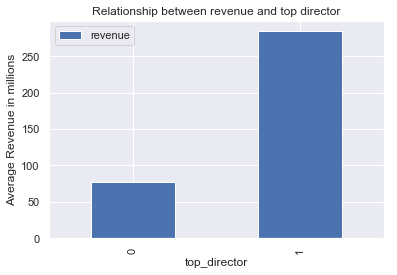

In [124]:
#Relationship between having a top director and revenue
_ = cleaned[['top_director','revenue']].groupby('top_director').mean().apply(lambda x: x/1e6).plot(kind='bar')
_ = plt.title('Relationship between revenue and top director')
_ = plt.ylabel('Average Revenue in millions')

### ROI

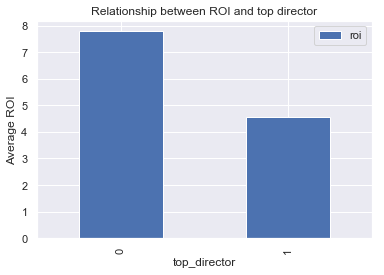

In [125]:
#Relationship between having a top director and roi
_ = cleaned[['top_director','roi']].groupby('top_director').mean().plot(kind='bar')
_ = plt.title('Relationship between ROI and top director')
_ = plt.ylabel('Average ROI')

A top director is defined as any director appearing on highest grossing actors list on IMDB. Similar to hiring a top actor, a top director also results in a much higher average revenue (~280M vs 75M USD). However, while the ROI is lower with a top director, it still almost twice as large as the ROI with a top actor. This could indicate that hiring a top director can result in higher revenues on lower budgets (i.e. higher ROIs), compared to hiring a top actor.

#### Are these observed differences in average revenue/ROI between movies with top directors and movies without top directors statistically significant?

#### T-test for difference in mean revenues

In [126]:
#Null hypothesis: Mean revenues are equal for movies made by top directors vs movies that aren't
#Alternate hypothesis: Mean revenues are not equal for movies made by top directors vs movies that aren't

stat,p = stats.ttest_ind(cleaned[cleaned.top_director == 0].revenue,cleaned[cleaned.top_director == 1].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Sample revenue means are not equal')
else:
    print('Fail to reject null hypothesis: Sample revenue means are equal')

test-statistic: -25.243
p-value: 8.254e-133
Reject null hypothesis: Sample revenue means are not equal


#### Bootstrapping approach for difference in mean revenues

In [127]:
#Calculate observed difference in mean
sample_diff = cleaned[cleaned.top_director == 0].revenue.mean() - cleaned[cleaned.top_director != 0].revenue.mean()
print(format(sample_diff,'.3e'))

-2.080e+08


In [128]:
#Calculate pooled mean
pooled_mean = cleaned.revenue.mean()

# Shift data for top_director and not_top_director assuming null hypothesis (i.e. mean for both samples = pooled_mean)
top_director = cleaned[cleaned.top_director == 0].revenue - cleaned[cleaned.top_director == 0].revenue.mean() + pooled_mean
no_top_director = cleaned[cleaned.top_director != 0].revenue - cleaned[cleaned.top_director != 0].revenue.mean() + pooled_mean

#Generate 10,000 samples for both samples of movies using shifted mean and store bootstrap replicates 
bs_diff_means = bs_diff_of_means(top_director,no_top_director,10000)

#Calculate p-value to be the probability of getting something more extreme than what we observed, assuming the 
#null hypothesis is true (difference in means = 0). Our observed difference of means is 2.08e+8.
#So our p-value is the probability of being more than 2.08e+8 units away from 0. 
#This is P(Diff_of_Means <= -2.08e+8) + P(Diff_of_Means >= 2.08e+8) or P(abs(Diff_of_Means) >= 2.08e+8)

p = (abs(bs_diff_means) >= abs(sample_diff)).sum()/len(bs_diff_means)
print('p: ' + format(p,'.3e'))
if p<0.05:
    print("Reject null hypothesis: Sample revenue means are not equal")
else:
    print("Fail to reject null hypothesis: Sample revenue means are equal")


p: 0.000e+00
Reject null hypothesis: Sample revenue means are not equal


Both the t-test and bootstrap approach confirm that the difference in mean revenues for both samples is statistically significant.

#### T-test for difference in mean ROIs

In [129]:
#Null hypothesis: Mean revenues are equal for movies that belong to a collection and movies that don't
#Alternate hypothesis: Mean revenues are not equal for movies that belong to a collection and movies that don't

stat,p = stats.ttest_ind(cleaned[cleaned.top_director == 0].roi,cleaned[cleaned.top_director == 1].roi)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3f'))
if p < 0.05:
    print('Reject null hypothesis: Sample ROI means are not equal')
else:
    print('Fail to reject null hypothesis: Sample ROI means are equal')

test-statistic: 0.331
p-value: 0.741
Fail to reject null hypothesis: Sample ROI means are equal


#### Bootstrapping approach  for difference in mean ROIs

In [130]:
#Calculate observed difference in mean
sample_diff = cleaned[cleaned.top_director == 0].roi.mean() - cleaned[cleaned.top_director != 0].roi.mean()
print(format(sample_diff,'.3f'))

3.235


In [131]:
#Calculate pooled mean
pooled_mean = cleaned.roi.mean()

# Shift data for top_director and not_top_director assuming null hypothesis (i.e. mean for both samples = pooled_mean)
top_director = cleaned[cleaned.top_director == 0].roi - cleaned[cleaned.top_director == 0].roi.mean() + pooled_mean
no_top_director = cleaned[cleaned.top_director != 0].roi - cleaned[cleaned.top_director != 0].roi.mean() + pooled_mean

#Generate 10,000 samples for both samples of movies using shifted mean and store bootstrap replicates 
bs_diff_means = bs_diff_of_means(top_director,no_top_director,10000)

#Calculate p-value to be the probability of getting something more extreme than what we observed, assuming the 
#null hypothesis is true (difference in means = 0). Our observed difference of means is 3.235.
#So our p-value is the probability of being more than 3.235 units away from 0. 
#This is P(Diff_of_Means =< -3.235) + P(Diff_of_Means >= 3.235 or P(abs(Diff_of_Means) >= 3.235)

p = (abs(bs_diff_means) >= abs(sample_diff)).sum()/len(bs_diff_means)
print('p: ' + format(p,'.3f'))
if p<0.05:
    print("Reject null hypothesis: Sample ROI means are not equal")
else:
    print("Fail to reject null hypothesis: Sample ROI means are equal")

p: 0.235
Fail to reject null hypothesis: Sample ROI means are equal


Both the t-test and bootstrapping approach fail to reject the null hypothesis that the mean ROIs for both samples are statistically different. However, their p-values are drastically different. As mentioned earlier, due to the presence of extreme outlines in the ROI data, the mean is not necessarily the best test statistic to use for comparison. Once again, we will use the Mann-Whitney U non-parametric test to test if the two sample distributions are equal instead.

#### Mann_Whitney U Test

In [132]:
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

stat,p = stats.mannwhitneyu(cleaned[cleaned.top_director == 0].revenue,cleaned[cleaned.top_director == 1].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(stat,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: Distributions of both samples are equal')

test-statistic: 392744.500
p-value: 3.927e+05
Reject null hypothesis: Distributions of both samples are not equal


In [133]:
stat,p = stats.mannwhitneyu(cleaned[cleaned.top_director == 0].roi,cleaned[cleaned.top_director == 1].roi)
print('test-statistic:', stat)
print('p-value:', p)
if p < 0.05:
    print('Reject null hypothesis: Distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: Distributions of both samples are equal')

test-statistic: 730181.0
p-value: 9.626003569320504e-17
Reject null hypothesis: Distributions of both samples are not equal


The Mann-Whitney U test shows that both samples do not come from the same distributions. Therefore, there is statistical difference between these distributions, indicating that ROI values for movies with top directors are statistically likely to be different form the ROI values for movies without top directors.

### What are the 10 most common languages used in this dataset?

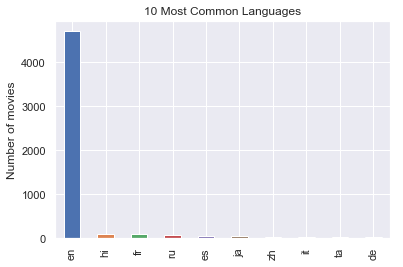

In [134]:
#Top 10 languages
_ = cleaned['original_language'].value_counts().head(10).plot(kind='bar')
_ = plt.ylabel('Number of movies')
_ = plt.title('10 Most Common Languages')

The vast majority of movies in this dataset are made in English (n=4711) followed by Hindi (n=96) and French (n=86).

### What is the most common genre in this dataset?

In [135]:
#Create temporary df with separate rows for each genre
temp = cleaned.genres.apply(pd.Series).stack().reset_index(level=1,drop=True).to_frame('temp_genre')
#Merge with 'cleaned' dataset to have a separate rows for each genre
temp = pd.merge(cleaned,temp,left_index=True,right_index=True)
#Group revenues and budgets by genre and calculate the average for each genre
x = temp['temp_genre'].value_counts().head(10)

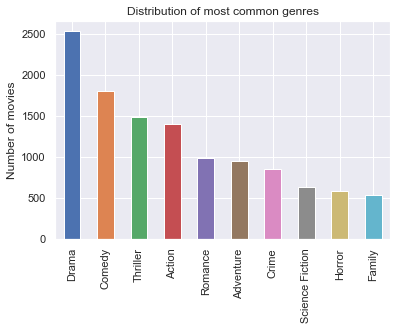

In [136]:
_ = x.plot(kind='bar')
_ = plt.ylabel('Number of movies')
_ = plt.title('Distribution of most common genres')

The most common genre is drama (~2500) followed by comedies, thrillers, and action movies.

### What genres are associated with the highest revenues, budgets, and ROIs?

In [137]:
#Create temporary df with separate rows for each genre
temp = cleaned.genres.apply(pd.Series).stack().reset_index(level=1,drop=True).to_frame('temp_genre')
#Merge with 'cleaned' dataset to have a separate rows for each genre
temp = pd.merge(cleaned,temp,left_index=True,right_index=True)
#Group revenues and budgets by genre and calculate the average for each genre
x = temp[['temp_genre','revenue','budget','roi']].groupby('temp_genre').mean().head(10)

#### Highest Average Revenues

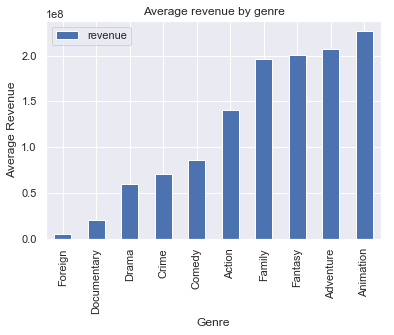

In [138]:
_ = x[['revenue']].sort_values('revenue').plot(kind='bar')
_ = plt.title('Average revenue by genre')
_ = plt.ylabel('Average Revenue')
_ = plt.xlabel('Genre')

Animated movies appear to have the highest average revenue followed closely by family, fantasy, and adventure. Foreign films, documentaries and dramas appear to have the lowest average revenues.

#### Highest Average Budget

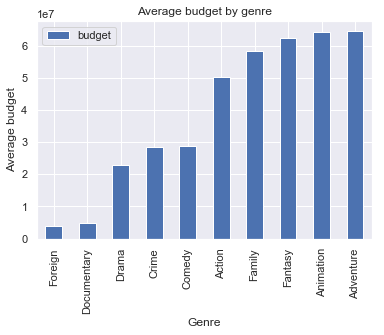

In [139]:
_ = x[['budget']].sort_values('budget').plot(kind='bar')
_ = plt.title('Average budget by genre')
_ = plt.ylabel('Average budget')
_ = plt.xlabel('Genre')

Adventure and animated movies appear to have the highest budgets, followed closely by fantasy and family. Comparing this with the previous plot, it seems that movie genres with higher budgets typically result in higher revenues.

#### Highest ROIs

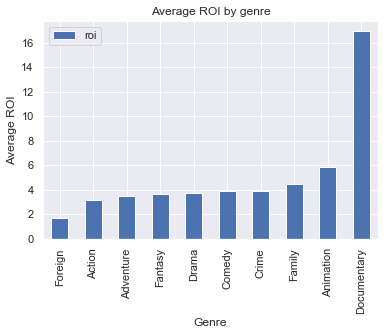

In [140]:
_ = x[['roi']].sort_values('roi').plot(kind='bar')
_ = plt.title('Average ROI by genre')
_ = plt.ylabel('Average ROI')
_ = plt.xlabel('Genre')

Documentary films have the highest ROI by far, followed by animated movies. Most other genres (except for foreign) result in similar ROIs on average.

### Is there a relationship between genre and categorical success?

#### Chisquare test of independence

In [141]:
#Create contingency table for chisquare test of independence
contingency_table = pd.crosstab(temp.temp_genre, temp.success_cat, margins = False)
contingency_table

success_cat,Blockbuster,Break Even,Disaster,Flop,Hit
temp_genre,,,,,
Action,223,440,114,272,346
Adventure,196,281,60,167,244
Animation,70,72,17,47,83
Comedy,377,503,159,347,420
Crime,132,266,76,172,201
Documentary,18,8,7,9,8
Drama,483,669,330,548,498
Family,118,156,25,86,141
Fantasy,96,161,34,92,122


In [142]:
#Conduct chisquare test
chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
print('test-statistic:', format(chi2,'.3f'))
print('p-value:', format(p,'.3e'))
print('degrees of freedom:', dof)

#Check p-value against significance level of 0.05
if p < 0.05:
    print('Reject null hypothesis: There is a relationship between genre and categorical success')
else:
    print('Fail to reject null hypothesis: There is no relationship between genre and categorical success')

test-statistic: 250.903
p-value: 1.485e-20
degrees of freedom: 76
Reject null hypothesis: There is a relationship between genre and categorical success


The chisquare test of independence concludes that there is a statistically significant correlation between genre and categorical success.